## Wave Equation Example

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# wave equation right hand side
def rhs(phi, pi, x, N, ng):
    """
    Performs the right hand side of the wave equation
    :param phi: solution at a time 't' (state vector)
    :param pi: 1st derivative of the solution (state vector)
    :param x: grid array (including ghosts)
    :param N: Number of physical points
    :param ng: Number of ghosts
    :return: dot_phi: derivative in time of the solution at time 't'
             dot_pi: 2nd derivative of the solution at a time 't'
    """

    n = N + 2*ng # total number of points
    phi_dot = np.zeros_like(x) # assign memory to the solution
    pi_dot = np.zeros_like(x) # assign memory to the solution

    d2_phi = np.zeros_like(x) # temporary storage for 2nd derivative of phi

    dx = x[1] - x[0] # grid spacing
    idx = 1. / dx

    # boundary conditions -> filling ghosts [staggered grid]
    phi[0] = phi[n-3] # left boundary
    phi[n-1] = phi[2] # right boundary
    pi[0] = pi[n-3]
    pi[n-1] = pi[2]

    # compute the right hand side
    for i in range(ng, N+ng):
        d2_phi[i] = idx * idx * (phi[i+1] + phi[i-1] - 2 * phi[i]) # finite differencing
        phi_dot[i] = pi[i]
        pi_dot[i] = d2_phi[i]

    return (phi_dot, pi_dot)

### Implement Runge Kutta, to evolve the RHS in time

In [6]:
def rk4(phi, pi, rhs, dt, x, N, ng):
    """
    Performs the time interation via Runge-Kutta 4th order method
    Requires: time-step 'dt', solution at time 't' and the right-hand side
    of the equation
    :param phi: Solution at time 't'
    :param pi: 1st derivative of the solution
    :param rhs: right-hand side of the equation, rhs(phi, pi, x, N, ng )
    :param dt: time-step
    :param x: x-grid, including ghosts
    :param N: number of physical points
    :param ng: number of ghost points
    :return: phi, pi
    """
    # give memory to temporary arrays
    tmp_phi = np.zeros_like(phi)
    tmp_pi = np.zeros_like(pi)

    # first RK step
    k1, l1 = rhs(phi, pi, x, N, ng)
    tmp_phi = k1 * 0.5 * dt + phi
    tmp_pi = l1 * 0.5 * dt + pi
    # second step
    k2, l2 = rhs(tmp_phi, tmp_pi, x, N, ng)
    tmp_phi = k2 * 0.5 * dt + phi
    tmp_pi = l2 * 0.5 * dt + pi
    # third step
    k3, l3 = rhs(tmp_phi, tmp_pi, x, N, ng)
    tmp_phi = k3 * dt + phi
    tmp_pi = l3 * dt + pi
    # forth step
    k4, l4 = rhs(tmp_phi, tmp_pi, x, N, ng)

    # combine all steps
    phi = phi + (1. / 6.) * dt * (k1 + 2. * (k2 + k3) + k4)
    pi = pi + (1. / 6.) * dt * (l1 + 2. * (l2 + l3) + l4)

    return (phi, pi)

### Setup the grid

In [7]:
N = 1001     # physical grid
ng = 1      # ghosts
xmin = -1
xmax = 1

n = N + 2 * ng # all points
dx = (xmax - xmin) / np.float(N - 1) # spacing
x = np.arange(start = xmin - dx, stop = xmax + dx + dx, step = dx) # from xmin-dx to xmax+dx

### Setup Initial Conditions

In [8]:
phi = np.cos(2 * np.pi  * x)
pi = 2 * np.pi * np.sin(2 * np.pi * x)

### Plot the initial profile of the wave

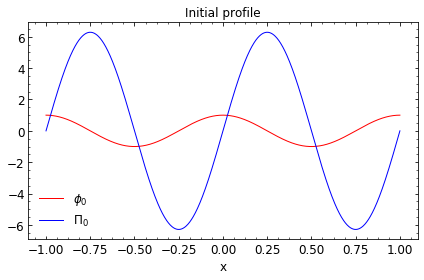

In [10]:
# plot initial profile
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x[ng:n-ng], phi[ng:n-ng], color='red', ls='-', lw=1., label=r'$\phi_0$')
ax.plot(x[ng:n-ng], pi[ng:n-ng], color='blue', ls='-', lw=1., label=r'$\Pi_0$')
ax.legend(loc='lower left', shadow=False, fontsize='large', frameon=False)
# ax.set_yscale("log")
ax.set_xlabel("x", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
)
ax.minorticks_on()
ax.set_title("Initial profile")
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(figpath + "inital_profile.png", dpi=128)
plt.tight_layout()
plt.show()

### do one time step to investigate the stability

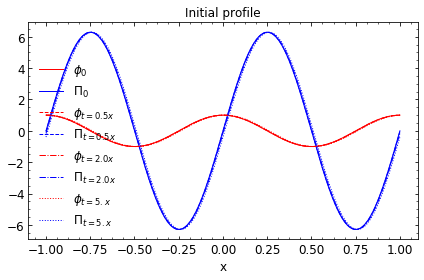

In [11]:
dt = 0.5 * dx
phi1, pi1 = rk4(phi, pi, rhs, dt, x, N, ng)

dt = 2.0 * dx
phi2, pi2 = rk4(phi, pi, rhs, dt, x, N, ng)

dt = 5.0 * dx
phi3, pi3 = rk4(phi, pi, rhs, dt, x, N, ng)

# plot initial profile
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x[ng:n-ng], phi[ng:n-ng], color='red', ls='-', lw=1., label=r'$\phi_0$')
ax.plot(x[ng:n-ng], pi[ng:n-ng], color='blue', ls='-', lw=1., label=r'$\Pi_0$')

ax.plot(x[ng:n-ng], phi1[ng:n-ng], color='red', ls='--', lw=1., label=r'$\phi_{t=0.5x}$')
ax.plot(x[ng:n-ng], pi1[ng:n-ng], color='blue', ls='--', lw=1., label=r'$\Pi_{t=0.5x}$')

ax.plot(x[ng:n-ng], phi2[ng:n-ng], color='red', ls='-.', lw=1., label=r'$\phi_{t=2.0x}$')
ax.plot(x[ng:n-ng], pi2[ng:n-ng], color='blue', ls='-.', lw=1., label=r'$\Pi_{t=2.0x}$')

ax.plot(x[ng:n-ng], phi3[ng:n-ng], color='red', ls=':', lw=1., label=r'$\phi_{t=5.x}$')
ax.plot(x[ng:n-ng], pi3[ng:n-ng], color='blue', ls=':', lw=1., label=r'$\Pi_{t=5.x}$')


ax.legend(loc='lower left', shadow=False, fontsize='large', frameon=False)
# ax.set_yscale("log")
ax.set_xlabel("x", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
    )
ax.minorticks_on()
ax.set_title("Initial profile")
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(figpath + "inital_profile.png", dpi=128)
plt.tight_layout()
plt.show()

### Evolve the wave with a stable CFL parameter

Computing...
res_phi: (500, 1004)
res_pi:  (500, 1004)
res_t:  (500,)


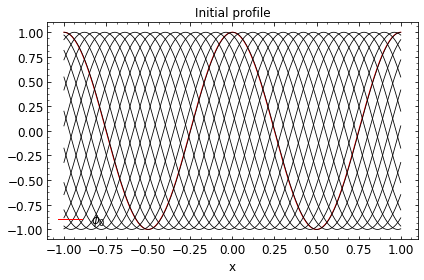

In [15]:
dt = 1.0 * dx       # stable timestep
tmax = 1.
assert dt < tmax

res_phi = []
res_pi = []
res_t = np.array(np.arange(start=0, stop = tmax, step = dt))

# print(dt, tmax, res_t); exit(1)

print("Computing...")

for i in range(int(tmax / dt)):
    phi, pi = rk4(phi, pi, rhs, dt, x, N, ng)
    res_phi.append(phi)
    res_pi.append(pi)
    #
    # print('{}/{} res: {} x:{}'.format(i+1, int(tmax/dt), len(phi), len(x)))
res_phi = np.reshape(res_phi, (int(tmax / dt), len(x)))
res_pi = np.reshape(res_pi, (int(tmax / dt), len(x)))
print("res_phi: {}".format(res_phi.shape))
print("res_pi:  {}".format(res_pi.shape))
print("res_t:  {}".format(res_t.shape))

# plot initial profile
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x[ng:n - ng], phi[ng:n - ng], color='red', ls='-', lw=1., label=r'$\phi_0$')
for i in range(len(res_t)):
    if i % 30 == 0:
        ax.plot(x[ng:n - ng], res_phi[i, ng:n - ng], color='black', ls='-', lw=0.8)#, label=r'$\phi_0$')

ax.legend(loc='lower left', shadow=False, fontsize='large', frameon=False)
# ax.set_yscale("log")
ax.set_xlabel("x", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
)
ax.minorticks_on()
ax.set_title("Initial profile")
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(figpath + "wave_propagation_1d.png", dpi=128)
plt.tight_layout()
plt.show()

## Methods of presentaiton
### Fancy 'heatmap' plot

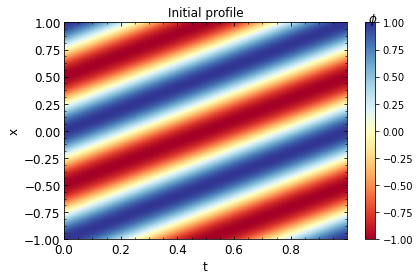

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)
#
im = ax.pcolormesh(res_t, x[ng:n - ng], res_phi[:, ng:n - ng].T, cmap="RdYlBu")
clb = fig.colorbar(im)
clb.set_label('$\phi$', fontsize='large', labelpad=-40, y=1.05, rotation=0)

ax.legend(loc='lower left',  shadow=False, fontsize='large', frameon=False)
# ax.set_yscale("log")
ax.set_xlabel("t", fontsize='large')
ax.set_ylabel("x", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
)
ax.minorticks_on()
ax.set_title("Initial profile")
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(figpath + "wave_propagation_colomesh.png", dpi=128)
plt.tight_layout()
plt.show()

### Even fancier 3D plot

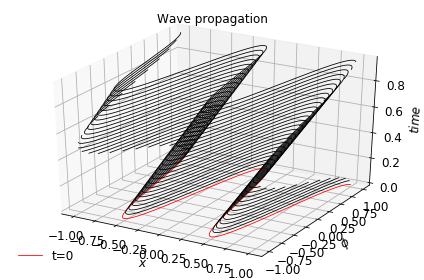

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(len(res_t)):
    if i % 20 == 0:
        z = np.zeros(x[ng:n - ng].shape)
        z.fill(res_t[i])
        # print("plotting t:{}".format(res_t[i]))
        if i == 0:
            color = "red"
            ax.plot(x[ng:n - ng], res_phi[i, ng:n - ng], z, color=color, ls='-', lw=0.8, label="t=0")
        else:
            color = "black"
            ax.plot(x[ng:n - ng], res_phi[i, ng:n - ng], z, color=color, ls='-', lw=0.8)

ax.legend(loc='lower left', shadow=False, fontsize='large', frameon=False)
# ax.set_yscale("log")
ax.set_xlabel("$x$", fontsize='large')
ax.set_ylabel("$\phi$", fontsize='large')
ax.set_zlabel("$time$", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
)
ax.minorticks_on()
ax.set_title("Wave propagation")
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(figpath + "wave_propagation_3d.png", dpi=128)
plt.tight_layout()
plt.show()